# LDDS

# Tutorial 5: High-dimensional continous systems

In this tutorial, we move on to high-dimensional Hamiltonian systems (more than 1DoF).

For the setup for these systems, LDDS requires extra input variables and parameters, since the *slice for visualisation* of LDs is not identical to the *grid of initial conditions* in phase space. Unlike 1DoF systems, the grid of initial conditions will be defined for a given fixed energy.

To illustrate the LDDS setups to utilise `compute_lagrangian_descriptor` we look at three Hamiltonian systems: The 2DoF Hénon-Heiles and Index-1 normal form saddle, and the 3DoF index-1 normal form saddle. We will work out the details as we move along.

## Hénon-Heiles (2DoF)

_Energy_

\begin{equation*}
H(x, y, p_x, p_y) = K + V = \frac{1}{2} (p_x^2 + p_y^2) + \frac{1}{2} (x^2 + y^2) + x^2 y - \frac{1}{3} y^3
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} =  p_x \\
 \dot{y} &= \frac{\partial H}{\partial p_y} = p_y  \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} =  -x - 2 x y \\
 \dot{p}_y &= -\frac{\partial H}{\partial y} =  -x^2 -y + y^2 \\
 \end{align*}

<span style="color:blue"><b>FIRST</b></span> We import standard functions as before

In [1]:
import os, sys
import numpy as np
sys.path.insert(1, os.pardir)

from ldds.base import compute_lagrangian_descriptor
from ldds.tools import draw_all_lds
from ldds.vector_fields import HenonHeiles_vector_field

PLUS, a Hamiltonian function, $H(x, p_x, y, p_y)$, and the potential energy surface (PES) function $V(x,y)$, associated to it.

In [2]:
from ldds.hamiltonians import HenonHeiles_Hamiltonian, HenonHeiles_potential

Hamiltonian = HenonHeiles_Hamiltonian
vector_field = HenonHeiles_vector_field

<span style="color:blue"><b>SECOND</b></span> Import input parameters.

First, we import the integration parameters as usual

In [3]:
# Integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

__BUT__, now we distinguish between the `slice_parameters` (a 2D plane formed by axes in phase space where LD values are visualised) and the `grid parameters` (from which we take intial conditions in phase space).

Here, we take the axes ($y, p_y$) for the visualisation slice. So, we specify these by defining the vairable `dims_slice`. Then, as before, we specify mesh dimensions for this visualisation slice. 

In [4]:
# 2D visualisation slice axes
dims_slice = [0,1,0,1] # Variable ordering (x y p_x p_y)

# Mesh parameters for visualisation slice
ax1_min,ax1_max = [-0.6, 1.2]
ax2_min,ax2_max = [-0.65, 0.65]
N1, N2 = [300, 300]

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

While for the grid of initial conditions, we take phase space points on a (high-dimensional) surface with fixed energy `H0`. 

The input parameters below are needed to find those points in phase space lying in that surface, by satisfying an energy conservation condition. Here, within ($y, p_x, p_y$) for the fixed section $x ( = 0)$ (`dims_fixed` and `dims_fixed_values` specify this) and only $p_x > 0$ (`momentum_sign` specifies this).

In [5]:
# Miscellaneous grid parameters
H0 = 1/5 # Energy
dims_fixed = [1,0,0,0] # Variable ordering (x y p_x p_y)
dims_fixed_values = [0] # This can also be an array of values
momentum_sign = 1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

Now, `grid_parameters` here is a dictionary instead of a list, like in 1DoF systems.

In [6]:
grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'momentum_sign' : momentum_sign,
        'Hamiltonian': Hamiltonian,
        'energy_level': H0
    }

This systems has blow up in finite time. So, we also specify the bounding box parametes for Variable Time Integration, as before.

In [7]:
# Box escape condition
box_boundaries = [[-5, 5], [-5, 5]]

<span style="color:blue"><b>THIRD</b></span> Compute and visualise LDs as before

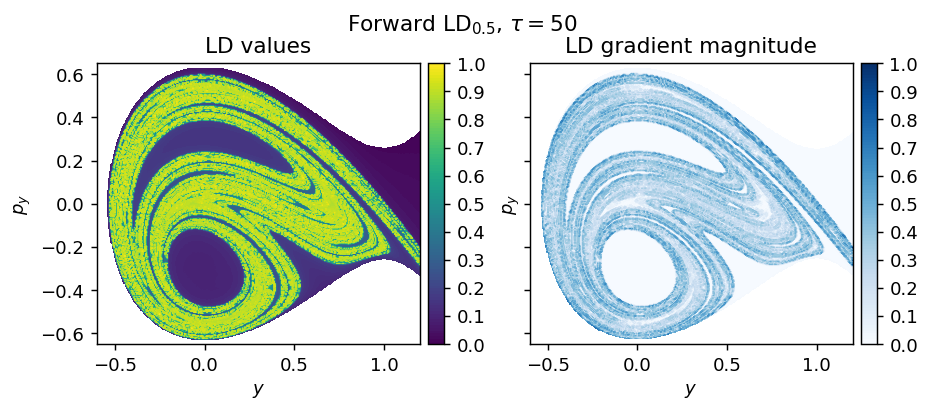

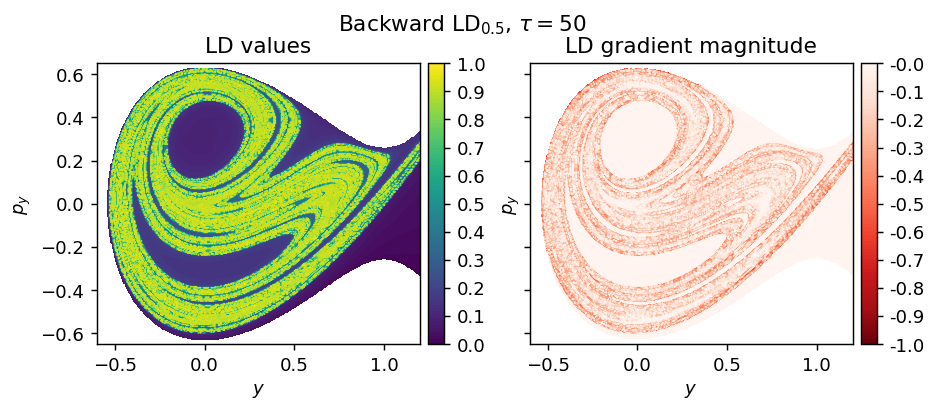

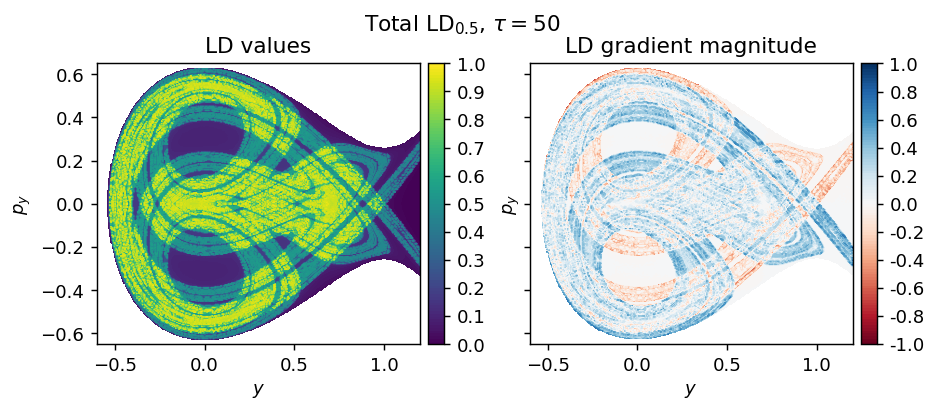

In [8]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

## Hénon-Heiles (different section)

In the example above we took the grid of initial conditions from the section $x = 0$ of the energy surface with `H0 = 1/5`, with $p_x > 0$, and with the visualization slice in $(y, p_y)$.

To find these points LDDS solves the momentum values $p_x$ via energy conservation. 

BUT, what if we want to look at a different section of the energy surface, with fix $p_x = 0$, for instance, so that we solve for $x$?

For this problem, solving the energy conservation condition requires searching for the roots of a non-quadratic equation - unlike when searching for momenta values, like in the case of $p_x$ in the example above. So we require a new input variable, `remaining_coordinate_bounds `, to help the solver where to search for $x$ values that satisfy energy conservation. 

In [ ]:
remaining_coordinate_bounds = [0,4]

Once, specified, the set up of LDDS will proceed as above, with `remaining_coordinate_bounds` entering in `grid_parameters` as the only difference. 

In [7]:
# Integration parameters
tau = 50

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 1/5 # Energy

ax1_min,ax1_max = [-0.6, 1.2]
ax2_min,ax2_max = [-0.65, 0.65]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = [[-5, 5], [-5, 5]]

# Miscellaneous grid parameters
dims_fixed = [0,0,1,0] # Variable ordering (x1 x2 y1 y2)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [0,1,0,1] # Visualisation slice

In [8]:
Hamiltonian = HenonHeiles_Hamiltonian
vector_field = HenonHeiles_vector_field

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'remaining_coordinate_bounds' : remaining_coordinate_bounds,
        'Hamiltonian': Hamiltonian,
        'energy_level': H0
    }

In [9]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value, box_boundaries)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value, box_boundaries)

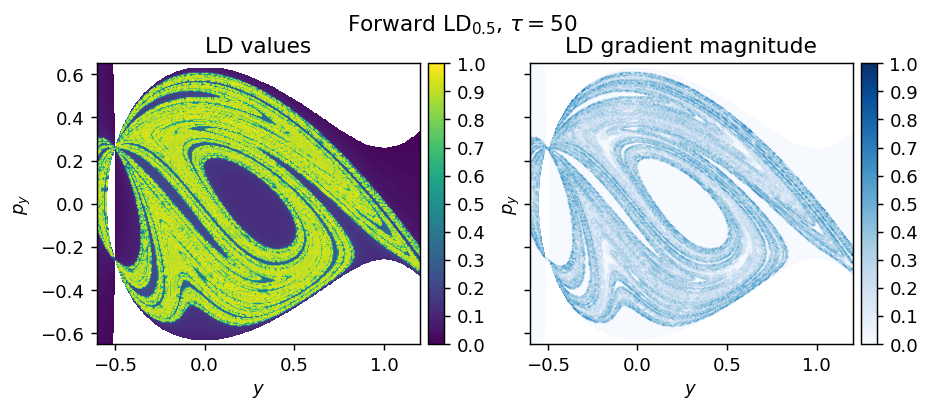

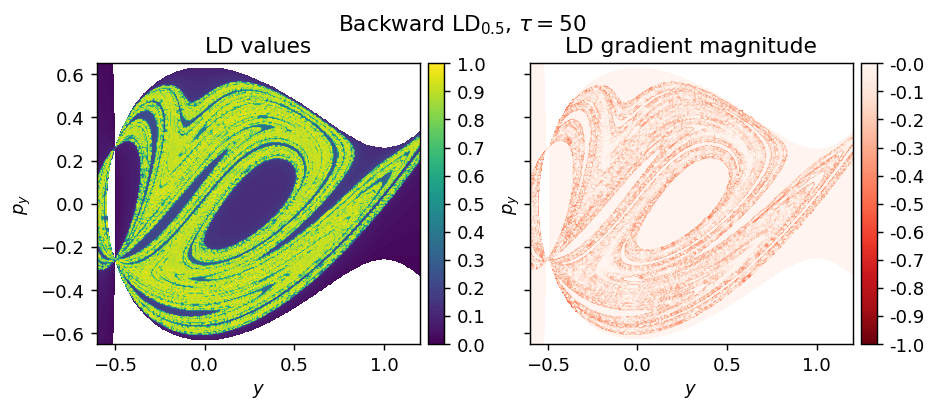

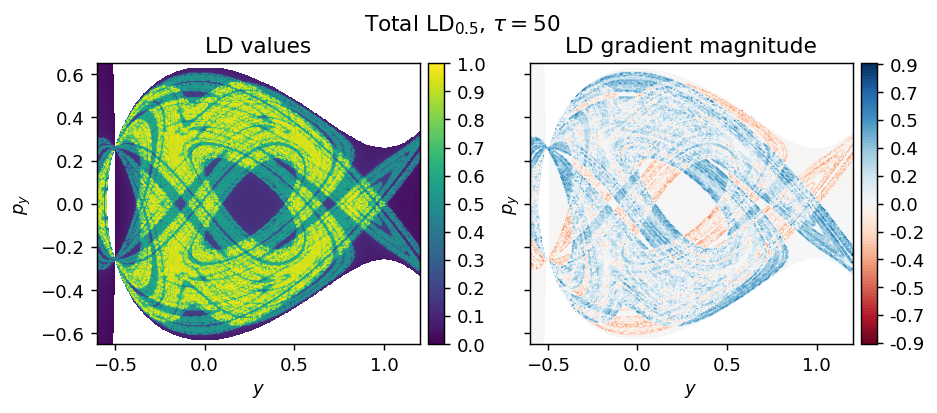

In [10]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

# Extra examples: 2DoF and 3DoF

The following additional examples show code lines in a more simplified manner, but following the same set up as above.

Feel free to play with them. 

## Index-1 Normal Form Saddle (2DoF)

In [11]:
from ldds.vector_fields import quadratic_normalform_saddlecenter
from ldds.hamiltonians import quadratic_normal_form_saddlecenter_ham, NFSaddle_potential

_Total Energy_

\begin{equation*}
H(x, y, p_x, p_y) = T(p_x, p_y) + V(x,y) = \frac{1}{2} (p_x^2 + p_y^2) + \frac{1}{2}(y^2 - x^2)
\end{equation*}

_Vector field_

\begin{align*}
 \dot{x} &= \frac{\partial H}{\partial p_x} =  p_x \\
 \dot{y} &= \frac{\partial H}{\partial p_y} = p_y  \\
 \dot{p}_x &= -\frac{\partial H}{\partial x} =  x \\
 \dot{p}_y &= -\frac{\partial H}{\partial y} =  -y \\
 \end{align*}

In [12]:
# Integration parameters
tau = 10

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 1 # Energy
ax1_min,ax1_max = [-2, 2]
ax2_min,ax2_max = [-2, 2]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Miscellaneous grid parameters
dims_fixed = [0,1,0,0] # Variable ordering (x1 x2 y1 y2)
dims_fixed_values = [0] # This can also be an array of values
dims_slice = [1,0,1,0] # Visualisation slice
momentum_sign = -1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

In [13]:
potential_energy = NFSaddle_potential
vector_field = quadratic_normalform_saddlecenter

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'momentum_sign' : momentum_sign,
        'potential_energy': potential_energy,
        'energy_level': H0
    }

In [14]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

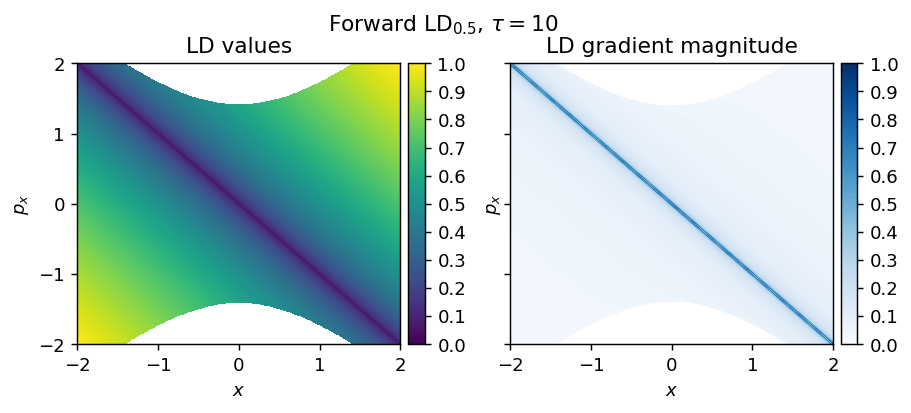

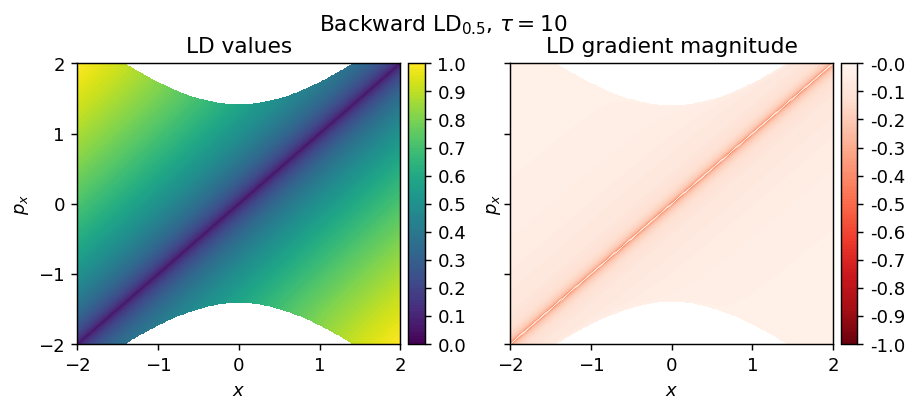

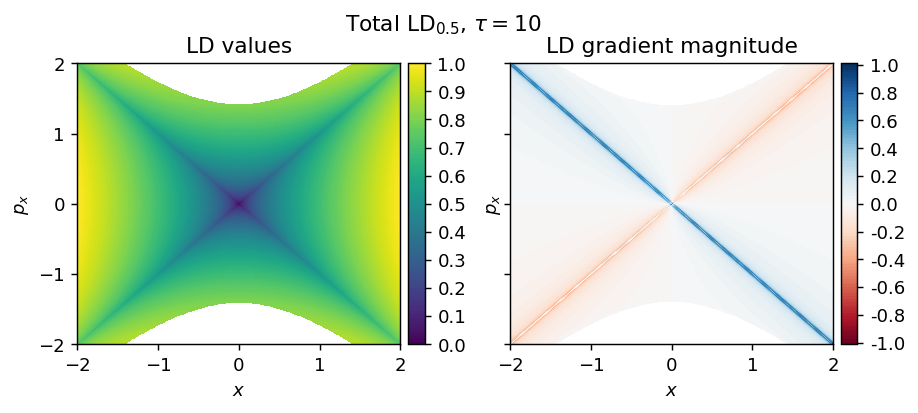

In [15]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters, tau, p_value)

## Index-1 Normal Form Saddle (3DoF)

In [16]:
from ldds.vector_fields import quadratic_normalform_saddlecentercenter
from ldds.hamiltonians import quadratic_normal_form_saddlecentercenter_ham

Total Energy

\begin{equation*}
H(x, y, z, p_x, p_y, p_z) = T(p_x, p_y, p_z) + V(x,y,z) = \frac{1}{2} \bigl(p_x^2 + p_y^2 + p_z^2\bigr) + \frac{1}{2}\bigl(y^2 + z^2 - x^2\bigr).
\end{equation*}

Vector field

\begin{align*}
\dot{x} &= p_x, \\
\dot{y} &= p_y, \\
\dot{z} &= p_z, \\
\dot{p}_x &= x, \\
\dot{p}_y &= -y, \\
\dot{p}_z &= -z.
\end{align*}

In [21]:
# Integration parameters
tau = 10

# Lp-norm, p-value
p_value = 1/2

# Mesh visualisation slice parameters
H0 = 1 # Energy
ax1_min,ax1_max = [-2, 2]
ax2_min,ax2_max = [-2, 2]
N1, N2 = [300, 300]

# Box escape condition
box_boundaries = False

# Grid parameters
dims_fixed = [0,1,1,0,1,0] # Variable ordering (x, y, z, p_x p_y p_z)
dims_fixed_values = [0,1,0.9] # This can also be an array of values
dims_slice = [1,0,0,1,0,0] # Visualisation slice
momentum_sign = -1 # Direction of momentum that defines the slice - (1) positive / (-1) negative

__NOTE__ LDDS can handle systems with n-DoF, as long as the lengths of `dims_fixed` and `dims_slice` are identical to the phase space dimension.

In [22]:
Hamiltonian = quadratic_normal_form_saddlecentercenter_ham
vector_field = quadratic_normalform_saddlecentercenter

slice_parameters = [[ax1_min, ax1_max, N1],[ax2_min, ax2_max, N2]]

grid_parameters = {
        'slice_parameters' : slice_parameters,
        'dims_slice' : dims_slice,
        'dims_fixed' : dims_fixed,
        'dims_fixed_values' : dims_fixed_values,
        'momentum_sign' : momentum_sign,
        'Hamiltonian': Hamiltonian,
        'energy_level': H0
    }

In [23]:
LD_forward = compute_lagrangian_descriptor(grid_parameters, vector_field, tau, p_value)
LD_backward = compute_lagrangian_descriptor(grid_parameters, vector_field, -tau, p_value)

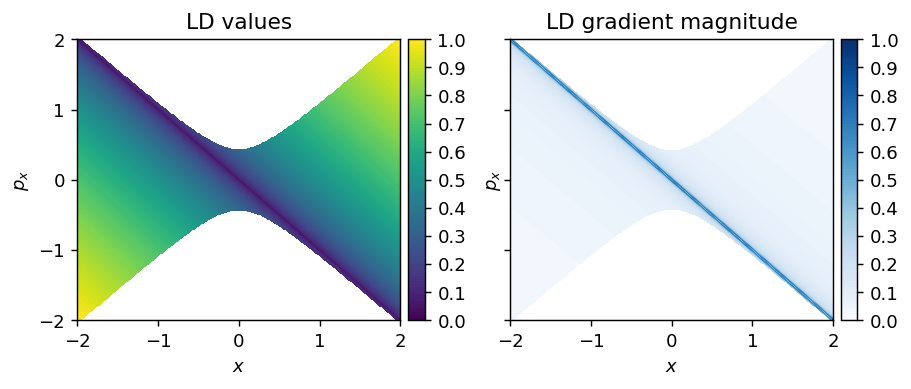

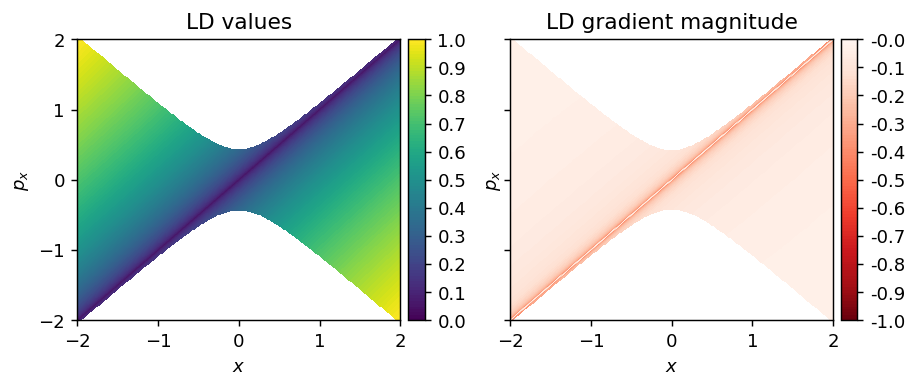

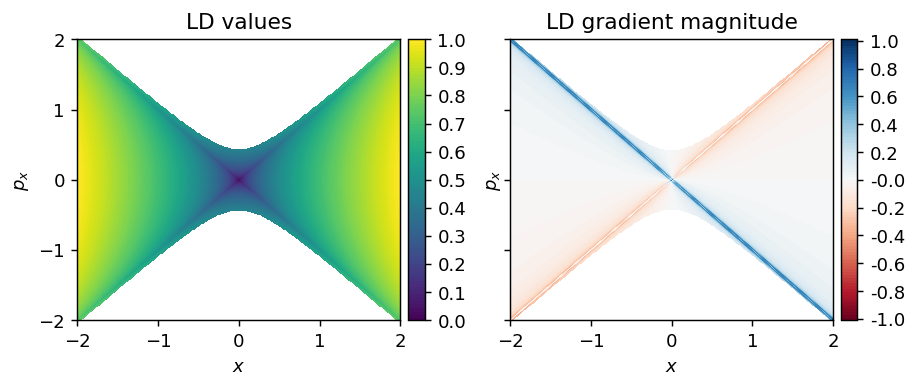

In [24]:
figs = draw_all_lds(LD_forward, LD_backward, grid_parameters)